In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.animation as animation # animation

import imageio 
import os
import netCDF4 as nc
import matplotlib as mpl
import shapefile
import pyproj

import fiona
from shapely.geometry import shape
import rasterio
import rasterio.transform
import rasterio.mask
from fiona import Feature, Geometry
from shapely.geometry import mapping, shape
import os

from scipy.ndimage import binary_dilation

from rasterio.warp import reproject, Resampling
from rasterio.crs import CRS
from osgeo import gdal

In [11]:
common_years = np.arange(2005,2017,1)
directory_interpolated = '/Users/francesco/Desktop/dataset_tif_interpolated/'

selecao_path = '/Users/francesco/Desktop/Thesis/Data/dataset_filtered/selecao.txt' #CHANGE IN CLUSTER
ids_selecao = np.loadtxt(selecao_path, dtype=int)

In [12]:
#get information from the shp file, without creating the output tif files

shapefile_path = '/Users/francesco/Desktop//Thesis/Data/ice_shelf.shp'

ids = []
Names = []
boundaries = []

shapefile=fiona.open(shapefile_path)

for feature in shapefile:

    id = feature['properties']['id']
    name=feature['properties']['name']
    geometry=feature['geometry']
    if geometry is None:
        continue

    bounds=shape(geometry).bounds

    #I expand the boundaries of 5000 m (10 pixels)
    xmin=bounds[0]-5000;ymin=bounds[1]-5000;xmax=bounds[2]+5000;ymax=bounds[3]+5000

    #Condition for Twaithes
    if id == 56:
        xmin=bounds[0]-57000;ymin=bounds[1]-50000;xmax=bounds[2]+50000;ymax=bounds[3]+10000


    #Taking the info
    ids.append(id)
    Names.append(name)
    boundaries.append([xmin,xmax,ymin,ymax])

#create a dataset with the information retrived from the previous bloc
df = pd.DataFrame({ 'Names':Names, 'boundaries': boundaries}, index = ids)

# I want to sort this dataset according to the index
df = df.sort_index()
pd.set_option('display.max_rows', None)
#Select just selecao
df = df[np.isin(df.index, ids_selecao)]

In [20]:
#Load the thickness_tif_interpolated
thickness_interpolated = np.load(directory_interpolated + 'thickness_tif_interpolated.npy', allow_pickle=True)
thickness_interpolated = pd.DataFrame(thickness_interpolated, index = df.index, columns = common_years)

thickness_inteprolated_pixels = np.load(os.getcwd()+'/interpolated_pixels_thickness.npy', allow_pickle=True)
thickness_inteprolated_pixels = pd.DataFrame(thickness_inteprolated_pixels, index = df.index, columns = common_years)

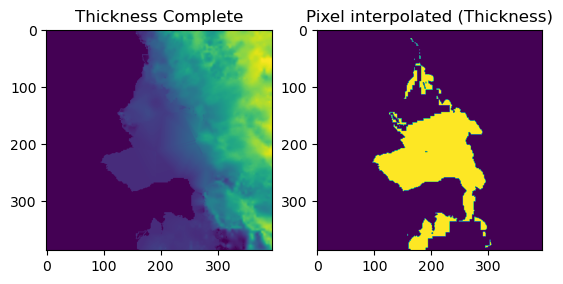

In [23]:
#Print
import matplotlib.pyplot as plt
id = 55
year =2008
# Plot the first image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
plt.imshow(thickness_interpolated.loc[56, 2012])
plt.title("Thickness Complete")

# Plot the second image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
plt.imshow(thickness_inteprolated_pixels.loc[56, 2012])
plt.title("Pixel interpolated (Thickness)")

plt.show()

In [25]:
#load the sea ice concentration
sic = np.load(os.getcwd()+'/interpolated_values_sea_ice_concnetration.npy', allow_pickle=True)
sic = pd.DataFrame(sic, index = df.index, columns = common_years)

#Load interpolated pixels
sic_interpolated_pixel = np.load(os.getcwd()+'/interpolated_pixel_sea_ice_concnetration.npy', allow_pickle=True)
sic_interpolated_pixel = pd.DataFrame(sic_interpolated_pixel, index = df.index, columns = common_years)

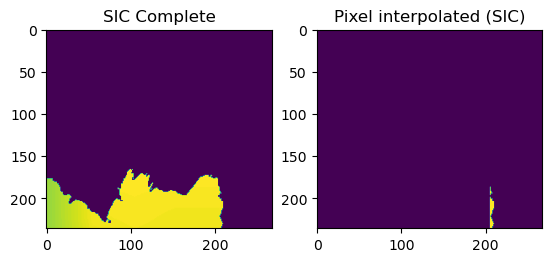

In [28]:
#Print
import matplotlib.pyplot as plt
id = 55
year =2008
# Plot the first image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
plt.imshow(sic.loc[id, year])
plt.title("SIC Complete")

# Plot the second image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
plt.imshow(sic_interpolated_pixel.loc[id, year])
plt.title("Pixel interpolated (SIC)")

plt.show()

In [30]:
#Load the velocity
velocity_x = np.load(os.getcwd()+'/interpolated_velocity_inpaint_x_multi_year_sea_set_to_0.npy', allow_pickle=True)
velocity_x = pd.DataFrame(velocity_x, index = df.index, columns = common_years)

velocity_y = np.load(os.getcwd()+'/interpolated_velocity_inpaint_y_multi_year_sea_set_to_0.npy', allow_pickle=True)
velocity_y = pd.DataFrame(velocity_y, index = df.index, columns = common_years)

#load the interpolated pixels
velocity_x_interpolated_pixel = np.load(os.getcwd()+'/interpolated_pixels_inpaint_x_multi_year.npy', allow_pickle=True)
velocity_x_interpolated_pixel = pd.DataFrame(velocity_x_interpolated_pixel, index = df.index, columns = common_years)

velocity_y_interpolated_pixel = np.load(os.getcwd()+'/interpolated_pixels_inpaint_y_multi_year.npy', allow_pickle=True)
velocity_y_interpolated_pixel = pd.DataFrame(velocity_y_interpolated_pixel, index = df.index, columns = common_years)



Text(0.5, 1.0, 'Pixel interpolated (Velocity X)')

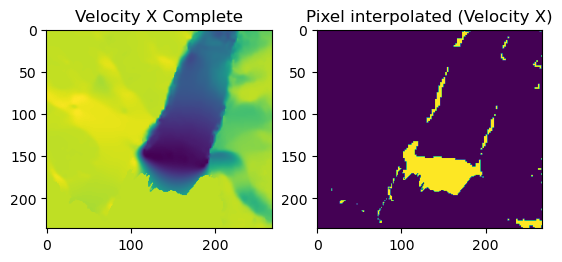

In [31]:
#print the velocity x
import matplotlib.pyplot as plt
id = 55
year =2008

# Plot the first image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
plt.imshow(velocity_x.loc[id, year])
plt.title("Velocity X Complete")

# Plot the second image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
plt.imshow(velocity_x_interpolated_pixel.loc[id, year])
plt.title("Pixel interpolated (Velocity X)")


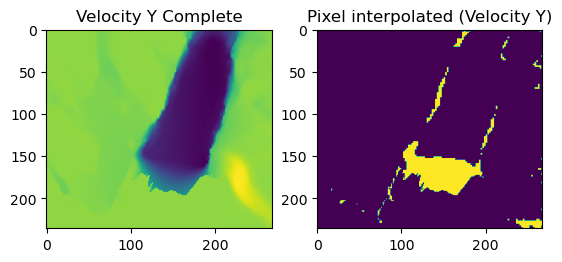

In [32]:
#print the velocity y
import matplotlib.pyplot as plt
id = 55
year =2008

# Plot the first image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
plt.imshow(velocity_y.loc[id, year])
plt.title("Velocity Y Complete")

# Plot the second image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
plt.imshow(velocity_y_interpolated_pixel.loc[id, year])
plt.title("Pixel interpolated (Velocity Y)")

plt.show()


In [33]:
#Load the ice mask
ice_mask = np.load(os.getcwd()+'/ice_mask.npy', allow_pickle=True)
ice_mask = pd.DataFrame(ice_mask, index = df.index, columns = common_years)

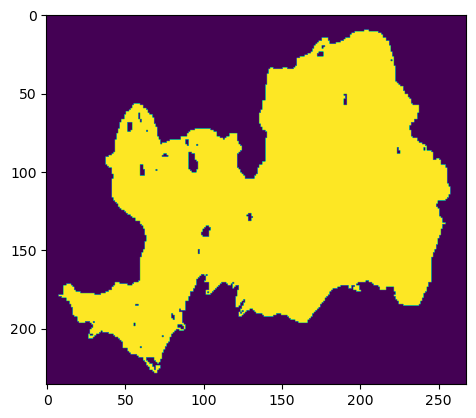

In [34]:
#print the ice mask
import matplotlib.pyplot as plt
id = 55
year =2008

plt.imshow(ice_mask.loc[id, year])  